<a href="https://colab.research.google.com/github/nebyu08/torch/blob/master/all_in_one_torch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing necssary packages

In [1]:
import torch
import torch.nn as nn
import numpy as np
from torch import optim
import matplotlib.pyplot as plt

In [2]:
#set up the device we are using
device="cuda" if torch.cuda.is_available() else "cpu"

print(f"we are using device:{device}")

we are using device:cpu


# data

In [3]:
#data processing
weights=0.7
bias=0.3

x=torch.arange(0,1,0.01).unsqueeze(dim=1)
y=x*weights+bias
x[:10],y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [4]:
 #split the data
 train_split=int(0.8*len(x))
 x_train,y_train=x[:train_split],y[:train_split]
 x_test,y_test=x[train_split:],y[train_split:]

In [5]:
len(x_train),len(x_test),len(y_train),len(y_test)

(80, 20, 80, 20)

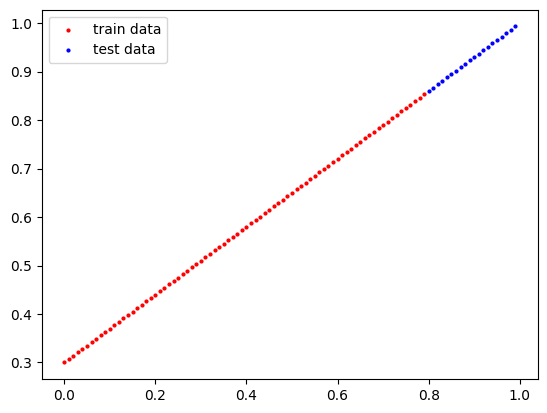

In [6]:
#lets plot the data
plt.scatter(x_train,y_train,label="train data",c="r",s=4)
plt.scatter(x_test,y_test,label="test data",c="b",s=4)
plt.legend();

In [7]:
#lets build a linear layer
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1
                                )

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)



In [8]:
torch.manual_seed(42)

linear_model=LinearRegressionModel()

In [9]:
linear_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [10]:
# lets change the place where the model runns into the device
linear_model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [11]:
device

'cpu'

In [12]:
# before traingin we need to put our data onto same device as the model
x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)

In [13]:
#lets setup the loss and optimizer
loss_fn=nn.L1Loss()
optimizer=torch.optim.Adam(linear_model.parameters(),lr=0.01)

epochs=200

#les train the model

linear_model.train()

for epoch in range(epochs):
  y_pred=linear_model(x_train)

  loss=loss_fn(y_pred,y_train)

  #lets restart the optimizer each epoch
  optimizer.zero_grad()

  #lets perform backpropagation
  loss.backward()

  optimizer.step()

  #for testing mode
  linear_model.eval()
  with torch.inference_mode():
    y_preds_test=linear_model(x_test)
    test_loss = loss_fn(y_preds_test, y_test)
    if epoch % 10 == 0:

      print(f"after {epoch:} | the loss value is {loss:.4f} | test loss is {test_loss:.4f}")

after 0 | the loss value is 0.5555 | test loss is 0.5688
after 10 | the loss value is 0.4160 | test loss is 0.3793
after 20 | the loss value is 0.2765 | test loss is 0.1898
after 30 | the loss value is 0.1370 | test loss is 0.0123
after 40 | the loss value is 0.0647 | test loss is 0.1609
after 50 | the loss value is 0.0697 | test loss is 0.1954
after 60 | the loss value is 0.0557 | test loss is 0.1425
after 70 | the loss value is 0.0447 | test loss is 0.0825
after 80 | the loss value is 0.0360 | test loss is 0.0653
after 90 | the loss value is 0.0259 | test loss is 0.0597
after 100 | the loss value is 0.0155 | test loss is 0.0304
after 110 | the loss value is 0.0048 | test loss is 0.0095
after 120 | the loss value is 0.0032 | test loss is 0.0070
after 130 | the loss value is 0.0008 | test loss is 0.0035
after 140 | the loss value is 0.0006 | test loss is 0.0003
after 150 | the loss value is 0.0012 | test loss is 0.0040
after 160 | the loss value is 0.0012 | test loss is 0.0002
after 17

In [14]:
linear_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7048]])),
             ('linear_layer.bias', tensor([0.2997]))])

In [15]:
weights,bias

(0.7, 0.3)

In [16]:
# lets visualize the testing data and predicted data
def plot_predictions(x_train=x_train.cpu(),y_train=y_train.cpu(),
                     x_test=x_test.cpu(),y_test=y_test.cpu(),
                     predictions=None):
  '''this plots the training,testing and prediction of the model'''
  plt.figure(figsize=(10,7))

  #visualizing the training data
  plt.scatter(x_train,y_train,c="b",s=4,label="training data");
  #visualizing the testing set of the data
  plt.scatter(x_test,y_test,c="g",s=6,label="testing label");
  if (predictions is not None):

    '''displays the difference between actual and predicted'''

    plt.scatter(y_test,predictions,c="r",label="predictions",s=4);
  plt.legend(prop={"size":14})
  plt.show()

* this was trained for like 600 epochs
* and a quick note the cpu is there becuase matplotlib works on cpu and not gpu/cuda and so had to change to cpu for the matplotlib to execute it

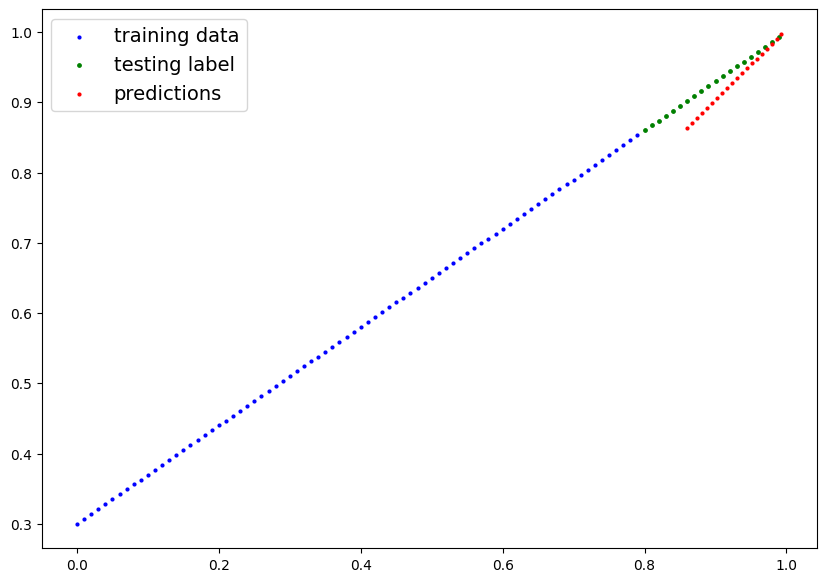

In [17]:
plot_predictions(predictions=y_preds_test.cpu())

In [18]:
#lets save the model
from pathlib import Path

model_path=Path("model")
model_path.mkdir(parents=True,exist_ok=True)

model_name="o1_torch_model.pth"

model_save_path=model_path/model_name

model_save_path

PosixPath('model/o1_torch_model.pth')

In [22]:
torch.save(obj=linear_model.state_dict(),f=model_save_path)

In [23]:
# load the saved model

#loading model
load_model=LinearRegressionModel()

#know lets assign the weigts to the model
load_model.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [26]:
load_model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [28]:
#lets compare between the saved model and loaded model
load_model.eval()
with torch.inference_mode():
  y_pred_load=load_model(x_test)

In [29]:
y_pred==y_pred_load

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])